<a href="https://colab.research.google.com/github/Rukaya-lab/Fraud-detection/blob/main/Fraud_Detection_with_Boruta_and_Hypertuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
fraud_data= pd.read_csv("https://raw.githubusercontent.com/dphi-official/Imbalanced_classes/master/fraud_data.csv")

In [ ]:
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2994681,0,242834,25.000,H,9803,583.0,150.0,visa,226.0,credit,269.0,87.0,NaN,NaN,yahoo.com,NaN,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,7.791666,0.791666,...,0.0,82050.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,NaN,529.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10.12,firefox 56.0,24.0,1920x1080,match_status:2,T,F,T,T,desktop,rv:56.0
1,3557242,0,15123000,117.000,W,7919,194.0,150.0,mastercard,166.0,debit,181.0,87.0,483.0,NaN,gmail.com,NaN,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.0,1.0,4.0,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3327470,0,8378575,73.773,C,12778,500.0,185.0,mastercard,224.0,credit,284.0,60.0,NaN,NaN,hotmail.com,hotmail.com,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.0,35.0,54.0,35.0,54.0,35.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3118781,0,2607840,400.000,R,12316,548.0,150.0,visa,195.0,credit,441.0,87.0,NaN,371.0,anonymous.com,anonymous.com,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.0,183599.0,NaN,NaN,6.0,-11.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,15.0,352.0,280.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 10.3.3,mobile safari generic,32.0,1136x640,match_status:2,T,F,T,F,mobile,iOS Device
4,3459772,0,12226544,31.950,W,9002,453.0,150.0,visa,226.0,debit,264.0,87.0,10.0,NaN,yahoo.com,NaN,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.0,15.0,405.0,32.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59054 entries, 0 to 59053
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(385), int64(18), object(31)
memory usage: 195.5+ MB


In [ ]:
fraud_data.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+04,59054.000000,5.905400e+04,59054.000000,59054.000000,58139.000000,58896.000000,58610.000000,52326.000000,52326.000000,23701.000000,3872.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,59054.000000,58933.000000,31100.000000,32839.000000,42208.000000,28075.000000,7421.000000,3947.000000,7553.000000,7553.000000,51514.000000,30902.000000,6580.000000,6324.000000,6317.000000,...,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,8211.000000,14555.000000,14194.000000,6697.000000,6697.000000,13820.000000,13820.000000,525.000000,525.000000,7553.000000,7553.000000,14205.000000,12887.000000,7963.000000,14061.00000,4511.000000,14059.000000,14054.000000,525.000000,525.000000,487.000000,524.000000,525.000000,7715.000000
mean,3.282166e+06,0.033952,7.368220e+06,134.142888,9910.366360,362.438054,153.264551,199.104231,290.653939,86.806616,115.655837,215.529442,13.213212,14.233447,0.005571,3.673773,5.480120,8.574305,2.476784,4.551275,4.422173,4.642226,9.597893,3.551428,31.658753,7.955397,94.243548,168.784855,28.215689,139.992561,42.073375,70.105107,41.393970,145.864171,0.552242,124.267325,147.232800,54.019149,18.445130,57.257084,...,14.844477,10.334673,0.061259,0.891609,0.318232,0.367556,1.470710,0.857752,849.716295,1577.078680,1152.623919,12.852454,67.041535,34.014493,59.909633,171.761661,111.076848,-10.241498,174517.019938,0.048828,-0.054950,1.564110,-6.731766,13.460952,-38.022857,0.084337,-0.274196,99.753982,47.978273,-345.713927,189.89958,14.238750,351.767622,404.594777,385.257143,15.748571,12.739220,326.225191,148.794286,26.499028
std,1.702573e+05,0.181107,4.612063e+06,233.112295,4893.704524,157.360648,11.395609,41.296438,101.796538,2.639572,366.462377,506.824710,123.135469,142.344325,0.163114,63.702441,25.570422,66.567581,56.502781,87.486345,16.593728,87.825362,87.212257,79.301070,124.218136,46.514295,157.679479,177.314255,62.528194,190.990250,88.257774,142.669131,98.446942,233.615671,0.319701,183.034325,185.927214,123.116200,69.076225,134.707158,...,113.784292,78.037190,0.312194,4.115381,1.434882,1.684518,9.305046,4.987901,6698.443610,11954.433804,8490.237746,366.868543,566.486726,390.038930,657.909569,1144.071698,823.586157,14.412998,158198.544249,0.607971,0.659661,5.071657,16.586186,11.546822,24.980822,0.932670,2.668107,1.106252,11.914148,91.661528,30.34787,1.524658,141.600677,152.201538,213.565534,6.496154,2.275238,97.662855,31.168092,3.739140
min,2.987019e+06,0.000000,8.673000e+04,0.292000,1008.000000,100.000000,100.000000,100.000000,100.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-90.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,43.000000,-12.000000,-12.000000,-32.000000,-100.000000,-31.000000,-100.000000,-26.000000,-100.000000,90.000000,11.000000,-660.000000,100.00000,11.000000,100.000000,100.000000,114.000000,14.000000,11.000000,100.000000,100.000000,0.000000
25%,3.135748e+06,0.000000,3.074217e+06,42.950000,6019.000000,215.000000,150.000000,166.000000,204.000000,87.000000,3.0000

In [ ]:
fraud_data.isnull().sum()

TransactionID         0
isFraud               0
TransactionDT         0
TransactionAmt        0
ProductCD             0
                  ...  
id_36             44849
id_37             44849
id_38             44849
DeviceType        44869
DeviceInfo        47133
Length: 434, dtype: int64

In [ ]:
fraud_data['isFraud'].value_counts()

0    57049
1     2005
Name: isFraud, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


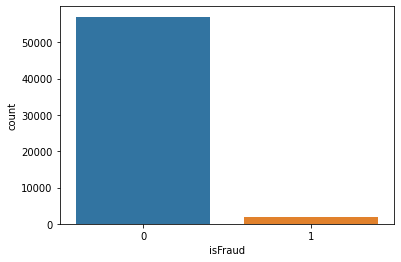

In [ ]:
sns.countplot(fraud_data['isFraud'])

In [ ]:
#filling missing values

# getting all the numerical columns
num_cols = fraud_data.select_dtypes(include=np.number).columns 
# filling missing values of numerical columns with mean value
fraud_data[num_cols] = fraud_data[num_cols].fillna(fraud_data[num_cols].mean())   # fills the missing values with mean


In [ ]:
# getting all the categorical columns
cat_cols = fraud_data.select_dtypes(include = 'object').columns    

# fills the missing values with maximum occuring element in the column
fraud_data[cat_cols] = fraud_data[cat_cols].fillna(fraud_data[cat_cols].mode().iloc[0])

In [ ]:
fraud_data.isnull().sum().sum()

0

In [ ]:
# earlier we have collected all the categorical columns in cat_cols

fraud_data = pd.get_dummies(fraud_data, columns=cat_cols)
fraud_data.shape
fraud_data.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,...,DeviceInfo_gxq6580_weg_l Build/LMY47I,DeviceInfo_hi6210sft Build/MRA58K,DeviceInfo_hp2015,DeviceInfo_iOS Device,DeviceInfo_iris 820 Build/MRA58K,DeviceInfo_iris702,DeviceInfo_moto,DeviceInfo_moto x4 Build/NPW26.83-18-2-0-4,DeviceInfo_moto x4 Build/OPW27.57-40,DeviceInfo_moto x4 Build/OPWS27.57-40-6,DeviceInfo_orbis,DeviceInfo_rv:11.0,DeviceInfo_rv:31.0,DeviceInfo_rv:33.0,DeviceInfo_rv:35.0,DeviceInfo_rv:38.0,DeviceInfo_rv:39.0,DeviceInfo_rv:41.0,DeviceInfo_rv:42.0,DeviceInfo_rv:43.0,DeviceInfo_rv:45.0,DeviceInfo_rv:46.0,DeviceInfo_rv:47.0,DeviceInfo_rv:48.0,DeviceInfo_rv:49.0,DeviceInfo_rv:50.0,DeviceInfo_rv:51.0,DeviceInfo_rv:52.0,DeviceInfo_rv:52.9,DeviceInfo_rv:53.0,DeviceInfo_rv:54.0,DeviceInfo_rv:55.0,DeviceInfo_rv:56.0,DeviceInfo_rv:57.0,DeviceInfo_rv:58.0,DeviceInfo_rv:59.0,DeviceInfo_rv:60.0,DeviceInfo_verykools4009,DeviceInfo_verykools5034,DeviceInfo_vivo
0,2994681,0,242834,25.000,9803,583.0,150.0,226.0,269.0,87.0,115.655837,215.529442,1,1,0,0,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,7.791666,0.791666,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,3557242,0,15123000,117.000,7919,194.0,150.0,166.0,181.0,87.0,483.000000,215.529442,1,4,0,0,0,1,0,0,3,0,3,0,4,1,63.0,35.000000,1.000000,4.000000,4.000000,70.105107,41.39397,145.864171,0.552242,4.000000,4.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3327470,0,8378575,73.773,12778,500.0,185.0,224.0,284.0,60.0,115.655837,215.529442,1,3,0,1,0,1,1,0,0,0,2,2,3,1,54.0,54.000000,35.000000,54.000000,35.000000,54.000000,35.00000,145.864171,0.552242,0.000000,147.2328,54.000000,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3118781,0,2607840,400.000,12316,548.0,150.0,195.0,441.0,87.0,115.655837,371.000000,1,1,0,1,0,1,0,1,0,1,1,0,1,1,0.0,168.784855,28.215689,139.992561,42.073375,70.105107,41.39397,145.864171,0.552242,124.267325,147.2328,54.019149,18.44513,57.257084,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,3459772,0,12226544,31.950,9002,453.0,150.0,226.0,264.0,87.0,10.000000,215.529442,3,3,0,0,3,4,0,0,3,0,2,0,33,3,54.0,54.000000,15.000000,405.000000,32.000000,70.105107,41.39397,145.864171,0.552242,71.000000,405.0000,54.019149,18.44513,57.257084,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Separate input features and output feature
# input features
X = fraud_data.drop(columns = ['isFraud'])       

# output feature
y = fraud_data.isFraud
y.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
scaled_features = StandardScaler().fit_transform(X)
scaled_features = pd.DataFrame(data=scaled_features)


# Let's see how the data looks after scaling
scaled_features.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1626,1627,1628,1629,1630,1631,1632,1633,1634,1635,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665
0,-1.688548,-1.544958,-0.468203,-0.021940,1.412632,-0.286861,0.653753,-0.225982,0.077832,1.224253e-16,2.190310e-16,-0.099186,-0.092969,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.652719e+00,2.094196e+00,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,67.391508,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
1,1.615662,1.681426,-0.073540,-0.406928,-1.078794,-0.286861,-0.804662,-1.144356,0.077832,1.582320e+00,2.190310e-16,-0.099186,-0.071893,-0.034155,-0.057671,-0.214317,-0.113785,-0.043835,-0.052023,-0.085706,-0.052858,-0.075654,-0.044784,-0.222665,-0.149534,-0.198351,-1.039716,-5.836866e-01,-0.842241,-0.625664,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-7.035279e-01,-1.064971,-3.458197e-16,0.0,-1.612884e-16,-8.579195e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
2,0.266093,0.219070,-0.258976,0.585989,0.881042,2.788641,0.605139,-0.069441,-10.788933,1.224253e-16,2.190310e-16,-0.099186,-0.078918,-0.034155,-0.041973,-0.214317,-0.113785,-0.026137,-0.052023,-0.266499,-0.052858,-0.087120,-0.019564,-0.230715,-0.149534,-0.255488,-0.892057,1.455011e-01,-0.532577,-0.116237,-3.184610e-01,-2.512549e-01,-1.020618e-15,-1.553743e-14,-7.269267e-01,0.000000,-4.659874e-04,0.0,-1.612884e-16,-5.897637e-01,...,-0.00582,-0.015399,-0.004115,-0.184841,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
3,-0.959645,-1.032167,1.140478,0.491581,1.188468,-0.286861,-0.099761,1.569022,0.077832,1.224253e-16,1.198129e+00,-0.099186,-0.092969,-0.034155,-0.041973,-0.214317,-0.113785,-0.043835,-0.040593,-0.266499,-0.041472,-0.098587,-0.044784,-0.246816,-0.149534,-0.598309,0.000000,-7.619398e-17,0.000000,0.000000,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-8.312926e-17,0.000000,-3.458197e-16,0.0,-1.612884e-16,-1.524289e-16,...,-0.00582,-0.015399,-0.004115,5.410044,-0.004115,-0.004115,-0.00582,-0.01008,-0.004115,-0.00582,-0.004115,-0.057854,-0.01008,-0.004115,-0.00582,-0.00582,-0.00582,-0.004115,-0.00582,-0.004115,-0.009202,-0.00582,-0.01164,-0.01594,-0.004115,-0.00582,-0.00823,-0.018406,-0.004115,-0.007128,-0.00582,-0.004115,-0.014839,-0.041185,-0.020164,-0.027306,-0.010888,-0.004115,-0.004115,-0.004115
4,1.043171,1.053404,-0.438389,-0.185621,0.580022,-0.286861,0.653753,-0.278162,0.077832,-4.551081e-01,2.190310e-16,-0.082944,-0.078918,-0.034155,-0.057671,-0.096993,-0.068717,-0.043835,-0.052023,-0.085706,-0.052858,-0.087120,-0.044784,0.010798,-0.106536,-0.255488,-0.892057,-2.834329e-01,1.641267,-0.165537,-2.810043e-16,2.792120e-16,-1.020618e-15,-1.553743e-14,-3.115979e-01,1.916563,-3.458197e-16,0.0,-1.612

In [ ]:
X = scaled_features

 # output feature
y = fraud_data.isFraud

In [ ]:
#splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, random_state= 42)

In [ ]:
# using SMOTE to treat the imbalance in the data

# import SMOTE 
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42, sampling_strategy = 'all')   # again we are eqalizing both the classes

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
# fit the sampling

X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# distribution of target class after sythetic sampling
y_train= pd.DataFrame(y_train)
y_train.value_counts()

1    39942
0    39942
dtype: int64

In [ ]:
## Fitting a random forest model to the data before feature selection

#### **Fitting a random forest model to the data before feature selection**

In [ ]:
forest = RandomForestClassifier(random_state= 42,n_estimators= 1000, max_depth=  5)
 
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
forest_predict = forest.predict(X_test)

In [ ]:
 print(classification_report(y_test, forest_predict))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     17107
           1       0.17      0.68      0.28       610

    accuracy                           0.88     17717
   macro avg       0.58      0.78      0.60     17717
weighted avg       0.96      0.88      0.91     17717



### **Fitting Model with Boruta**

In [ ]:

!pip install Boruta

In [ ]:
from boruta import BorutaPy

In [ ]:
rdf = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=5)
boruta_selector = BorutaPy(rdf, n_estimators='auto', verbose=2, random_state=42)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

In [ ]:
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True ... False False False]
Ranking:  [  1   1   1 ... 739 739 739]
No. of significant features:  468


In [ ]:
selected_features = pd.DataFrame({
                                      'Ranking':boruta_selector.ranking_})
selected_features.sort_values(by='Ranking')

,Ranking
0,1
324,1
323,1
322,1
321,1
...,...
988,739
989,739
990,739
993,739


In [ ]:
## creating a new subse of data with selected features


X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:
# Create a new random forest classifier for the most important features
rf_important = RandomForestClassifier(random_state= 42, n_estimators= 1000, n_jobs = -1)

# Train the new classifier on the new dataset containing the most important features
rf_important.fit(X_important_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
rf_predict = rf_important.predict(X_important_test)

In [ ]:
 print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     17107
           1       0.80      0.35      0.49       610

    accuracy                           0.97     17717
   macro avg       0.89      0.67      0.74     17717
weighted avg       0.97      0.97      0.97     17717



**HyperTuning after Feature Selection**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [5, 10, 15],
    'n_estimators': [500, 1000]}

In [ ]:
rdf = RandomForestClassifier(random_state=42)

# Grid search cv
grid_search = GridSearchCV(estimator = rdf, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [ ]:
grid_search.fit(X_important_train, y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 47.6min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 15, 'n_estimators': 500}

In [ ]:
print(classification_report(y_test, grid_search.predict(X_important_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     17107
           1       0.70      0.40      0.51       610

    accuracy                           0.97     17717
   macro avg       0.84      0.70      0.75     17717
weighted avg       0.97      0.97      0.97     17717



In [ ]:
## th accuracy has increased from the base line model to the model with boruta and then more with hyper tuning.